<a href="https://colab.research.google.com/github/shreyajagtap/ML-PROJECT/blob/main/project_1/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
data.shape

(1596, 12)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#step1- data analysis and visualization
#statistical measures
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


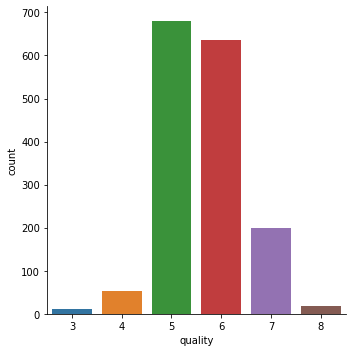

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

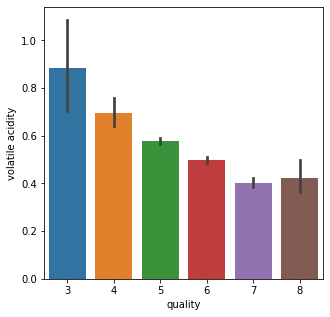

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='quality', y = 'volatile acidity', data = data)


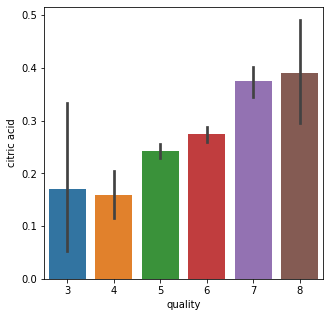

In [ ]:
# critic acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='quality', y = 'citric acid', data = data)

In [ ]:
# Correlation
correlation = data.corr()

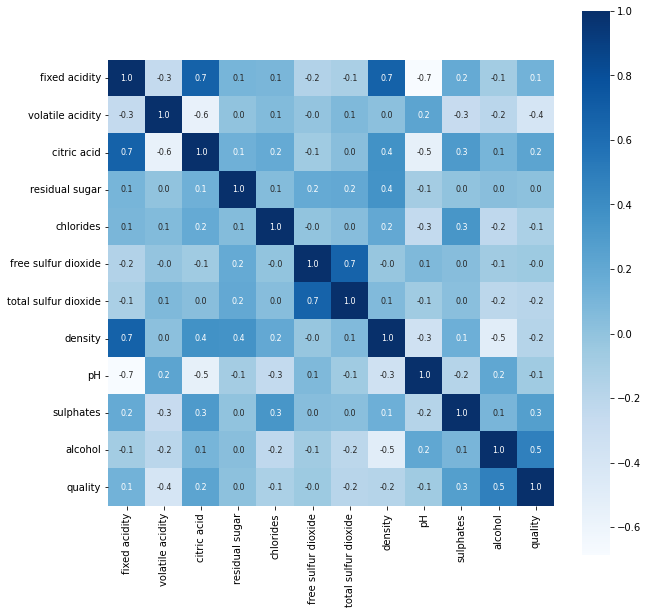

In [ ]:
#types of corr=> Positive corr and Negative corr
#directly proportional i.e if one value increases, other also increases is positive corr. Iversely proportional is negative corr
#constructing heat map to understand corr between colums

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [ ]:
#step2- Data Pre Processing 
#1 separate data and label

X = data.drop('quality', axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1591            6.2             0.600         0.08             2.0      0.090   
1592            5.9             0.550         0.10             2.2      0.062   
1593            6.3             0.510         0.13             2.3      0.076   
1594            5.9             0.645         0.12             2.0      0.075   
1595            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#Label Binarization

Y = data['quality' ].apply(lambda y_value:1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: quality, Length: 1596, dtype: int64


In [ ]:
#step3- Train and test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1596,) (1276,) (320,)


In [ ]:
#Model training
#Random Forest Classifier 

model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Model Evaluation
#Accuracy score 
#accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuray : ', test_data_accuracy)

Accuray :  0.884375


In [ ]:
# Building a predictive system

input_data = (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)
 
#changing input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5)
 
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
